In [1]:
pip install pandas requests

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [16]:
import requests
from bs4 import BeautifulSoup

resource_url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36',
}
 
response = requests.get(resource_url, headers=headers)
 
if response.status_code == 200:
    print(response.text)  # Print the content of the response
else:
    print(f'Request failed with status code: {response.status_code}')

soup = BeautifulSoup(response.text, 'html')
soup
print(soup())



<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
    <head>
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
		<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" />
		<title>Tesla Revenue 2010-2023 | TSLA | MacroTrends</title>
		<link rel="icon" type="image/x-icon" href="/assets/images/icons/FAVICON/macrotrends-favicon.ico">
		<meta name="description" content="Tesla annual/quarterly revenue history and growth rate from 2010 to 2023. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Revenue is the top line item on an income statement from which all costs and expenses are subtra

In [2]:
tables = soup.find_all("table")


revenue_table= soup.find("table", class_="historical_data_table")
print(revenue_table)

<table class="historical_data_table table">
<thead>
<tr>
<th colspan="2" style="text-align:center">Tesla Annual Revenue<br/><span style="font-size:14px;">(Millions of US $)</span></th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:center">2023</td>
<td style="text-align:center">$96,773</td>
</tr>
<tr>
<td style="text-align:center">2022</td>
<td style="text-align:center">$81,462</td>
</tr>
<tr>
<td style="text-align:center">2021</td>
<td style="text-align:center">$53,823</td>
</tr>
<tr>
<td style="text-align:center">2020</td>
<td style="text-align:center">$31,536</td>
</tr>
<tr>
<td style="text-align:center">2019</td>
<td style="text-align:center">$24,578</td>
</tr>
<tr>
<td style="text-align:center">2018</td>
<td style="text-align:center">$21,461</td>
</tr>
<tr>
<td style="text-align:center">2017</td>
<td style="text-align:center">$11,759</td>
</tr>
<tr>
<td style="text-align:center">2016</td>
<td style="text-align:center">$7,000</td>
</tr>
<tr>
<td style="text-align:center">2015</

In [3]:
import pandas as pd

for index, table in enumerate(tables):
    if ("Tesla Quarterly Revenue" in str(table)):
        table_index = index
        break

In [4]:
quarterly_revenue = pd.DataFrame(columns=['Date', 'Revenue'])

In [5]:
for row in soup.find_all("table")[1].tbody.findAll('tr'):
    # Find all data for each column
    columns = row.find_all('td')
    if(columns != []):
        date = columns[0].text.strip()
        revenue = columns[1].text.replace(",", "").replace("$", "")
        data= pd.DataFrame([[date,revenue]], columns=['Date','Revenue'])   
        quarterly_revenue=pd.concat([quarterly_revenue,data], ignore_index=True)
print(quarterly_revenue.head())

         Date Revenue
0  2023-12-31   25167
1  2023-09-30   23350
2  2023-06-30   24927
3  2023-03-31   23329
4  2022-12-31   24318


In [7]:
quarterly_df = quarterly_revenue[quarterly_revenue["Revenue"] != ""]


In [8]:
import sqlite3

connection = sqlite3.connect("Tesla_revenue.db")
connection

cursor = connection.cursor()

In [9]:
cursor.execute("""CREATE TABLE Quarterly_Revenue (Date, Revenue)""")

In [10]:
quarterly_df.to_sql('Quarterly_Revenue', con=connection, if_exists='replace', index = False)

connection.commit()

In [11]:
for row in cursor.execute("SELECT * FROM Quarterly_Revenue"):
    print(row)

import matplotlib.pyplot as plt
import seaborn as sns

('2023-12-31', '25167')
('2023-09-30', '23350')
('2023-06-30', '24927')
('2023-03-31', '23329')
('2022-12-31', '24318')
('2022-09-30', '21454')
('2022-06-30', '16934')
('2022-03-31', '18756')
('2021-12-31', '17719')
('2021-09-30', '13757')
('2021-06-30', '11958')
('2021-03-31', '10389')
('2020-12-31', '10744')
('2020-09-30', '8771')
('2020-06-30', '6036')
('2020-03-31', '5985')
('2019-12-31', '7384')
('2019-09-30', '6303')
('2019-06-30', '6350')
('2019-03-31', '4541')
('2018-12-31', '7226')
('2018-09-30', '6824')
('2018-06-30', '4002')
('2018-03-31', '3409')
('2017-12-31', '3288')
('2017-09-30', '2985')
('2017-06-30', '2790')
('2017-03-31', '2696')
('2016-12-31', '2285')
('2016-09-30', '2298')
('2016-06-30', '1270')
('2016-03-31', '1147')
('2015-12-31', '1214')
('2015-09-30', '937')
('2015-06-30', '955')
('2015-03-31', '940')
('2014-12-31', '957')
('2014-09-30', '852')
('2014-06-30', '769')
('2014-03-31', '621')
('2013-12-31', '615')
('2013-09-30', '431')
('2013-06-30', '405')
('2013-0

/tmp/ipykernel_12526/78575779.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quarterly_df['Date'] = pd.to_datetime(quarterly_df['Date'])
/tmp/ipykernel_12526/78575779.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quarterly_df["Revenue"] = quarterly_df["Revenue"].astype('int')


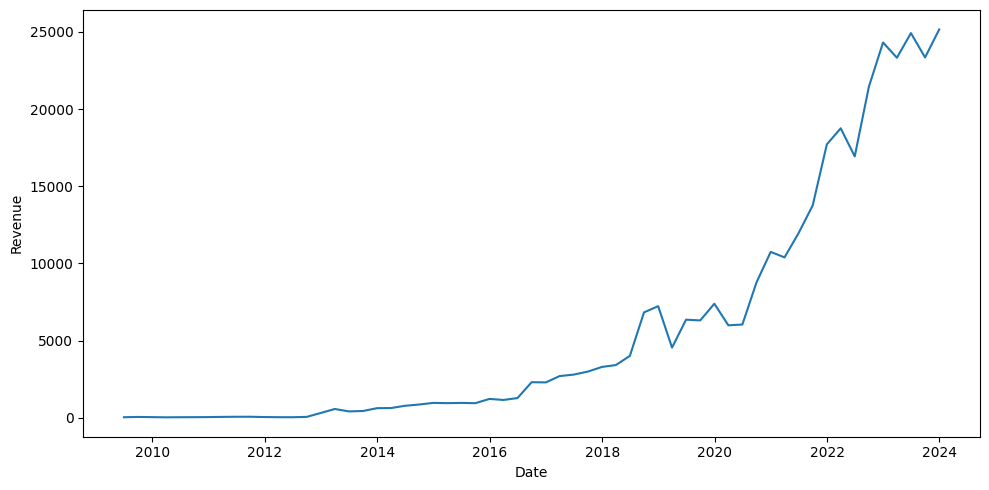

In [12]:
quarterly_df['Date'] = pd.to_datetime(quarterly_df['Date'])
quarterly_df["Revenue"] = quarterly_df["Revenue"].astype('int')

plt.figure(figsize = (10, 5))

sns.lineplot(data= quarterly_df, x='Date', y='Revenue')
plt.tight_layout()

plt.show()

/tmp/ipykernel_12526/1007186890.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quarterly_df['Date'] = pd.to_datetime(quarterly_df['Date'])


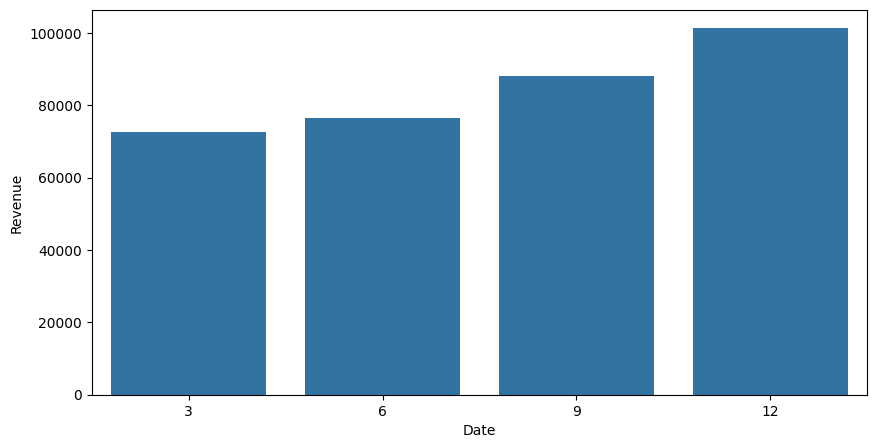

In [13]:
plt.figure(figsize = (10, 5))
quarterly_df['Date'] = pd.to_datetime(quarterly_df['Date'])
monthly_distribution= quarterly_df.groupby(quarterly_df['Date'].dt.month).sum().reset_index()

sns.barplot(data= monthly_distribution, x = "Date", y = "Revenue")

plt.show()

/tmp/ipykernel_12526/1073247839.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quarterly_df['Date'] = pd.to_datetime(quarterly_df['Date'])


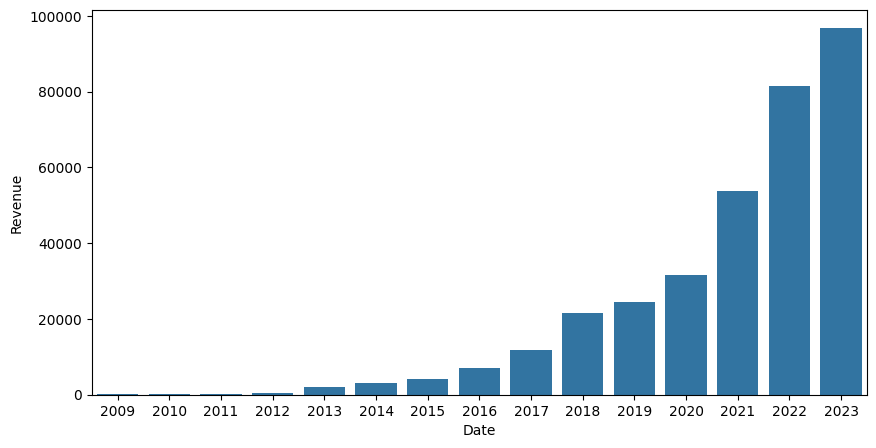

In [14]:
plt.figure(figsize = (10, 5))
quarterly_df['Date'] = pd.to_datetime(quarterly_df['Date'])
monthly_distribution= quarterly_df.groupby(quarterly_df['Date'].dt.year).sum().reset_index()

sns.barplot(data= monthly_distribution, x = "Date", y = "Revenue")

plt.show()